In [60]:
##https://medium.com/%E7%94%A8%E5%8A%9B%E5%8E%BB%E6%84%9B%E4%B8%80%E5%80%8B%E4%BA%BA%E7%9A%84%E8%A9%B1-%E5%BF%83%E4%B9%9F%E6%9C%83%E7%97%9B%E7%9A%84/%E9%BB%98%E9%BB%98%E5%9C%B0%E5%AD%B8deep-learning-4-698d00aba2ca

import os
import glob
import numpy as np
import keras
from keras.preprocessing.image import  img_to_array, load_img
from PIL import Image
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#%%

In [61]:

dict_labels = {"daisy":0, "dandelion":1, "rose":2, "sunflower":3, "tulip":4}
size = (256,256) #由於原始資料影像大小不一，因此制定一個統一值
nbofdata=2000   #從各個資料夾中抓取特定數量的檔案
#%% Read Traget Folders' Path
labels=['daisy','dandelion','rose','sunflower','tulip']
base_path = '/Users/maylin/Documents/Data/image_data/train/'
layers_of_folders=0
folder_list=[]
if base_path :
    folder_layers=[]
    files = os.scandir(base_path)
    #  Get the 1st layer of folder
    first_folder = []
    first_folder_kind = []
    for entry in files:
        if entry.is_dir():
            first_folder.append(entry.path)
            first_folder_kind.append(entry.name)
    folder_layers.append(first_folder_kind)
    folder_list.append(first_folder)
    #  Get the 2nd layer of folder
    second_folder = []
    if first_folder:
        second_folder = []
        second_folder_kind = []
        layers_of_folders+=1
        for fldr in first_folder:
            files = os.scandir(fldr)
            for entry in files:
                if entry.is_dir():
                    second_folder.append(entry.path)
                    second_folder_kind.append(entry.name)
        second_folder_kind= second_folder_kind[0:int(len(second_folder_kind)/len(first_folder_kind))]
        folder_layers.append(second_folder_kind)
        folder_list.append(second_folder)
    #  Get the 3rd layer of folder
    third_folder = []
    if second_folder:
        third_folder = []
        third_folder_kind = []
        layers_of_folders+=1
        for fldr in second_folder:
            files = os.scandir(fldr)
            for entry in files:
                if entry.is_dir():
                    third_folder.append(entry.path)
                    third_folder_kind.append(entry.name)
        third_folder_kind= third_folder_kind[0:int(len(third_folder_kind)/(len(second_folder_kind)*len(first_folder_kind)))]
        folder_list.append(third_folder)
    #  Get the 4th layer of folder
    forth_folder = []
    if third_folder:
        forth_folder = []
        forth_folder_kind = []
        layers_of_folders+=1
        for fldr in third_folder:
            files = os.scandir(fldr)
            for entry in files:
                if entry.is_dir():
                    forth_folder.append(entry.path)
                    forth_folder_kind.append(entry.name)
        forth_folder_kind= forth_folder_kind[0:int(len(forth_folder_kind)/(len(third_folder_kind)*len(second_folder_kind)*len(first_folder_kind)))]
        folder_list.append(forth_folder)
     #  Get the 5th layer of folder
    if forth_folder:
        fifth_folder = []
        fifth_folder_kind = []
        layers_of_folders+=1
        for fldr in third_folder:
            files = os.scandir(fldr)
            for entry in files:
                if entry.is_dir():
                    fifth_folder.append(entry.path)
                    fifth_folder_kind.append(entry.name)
        fifth_folder_kind= fifth_folder_kind[0:int(len(fifth_folder_kind)/(len(forth_folder_kind)*len(third_folder_kind)*len(second_folder_kind)*len(first_folder_kind)))]
#%% Read Image Files (*.tif)
datanumber=nbofdata
blob=[]
blob_nparray=[]
image_data=[]
conc = 0
labels_dict={}
for entry1 in folder_list[layers_of_folders - 1]:
    blob = []
    cellname = os.path.basename(os.path.dirname(entry1))  # extract cell name
    print('cellname:'+ cellname)
    concnames = os.path.basename(entry1)  # extract concentration
    print('concname:' +concnames)
    if concnames in labels:
        labels_dict[conc] = concnames
        #print(entry1) 
        fnamelist = glob.glob(os.path.join(entry1, '*.jpg'))
        for filename in fnamelist[0:datanumber]:
            im = Image.open(filename)
            if im is not None:
                if im.mode=='RGB':
                    im=im.resize(size,Image.BILINEAR)
                    imarray = np.array(im)
                    blob.append(imarray)
        ind = np.reshape(np.arange(1, len(blob) + 1), (-1, 1))
        blob_nparray = np.reshape(np.asarray(blob), (len(blob), blob[1].size))
        blob_nparray = np.hstack((blob_nparray, ind, conc * np.ones((len(blob), 1))))
        image_data.append(np.asarray(blob_nparray, dtype=np.float32))
        print(concnames+'  finished!')
        conc += 1


cellname:train
concname:daisy
daisy  finished!
cellname:train
concname:rose
rose  finished!
cellname:train
concname:tulip
tulip  finished!
cellname:train
concname:dandelion
dandelion  finished!
cellname:train
concname:sunflower
sunflower  finished!


In [62]:
print(len(labels))

5


In [63]:
#%%
for j in range(len(labels)):
    trytry=image_data[j][:]
# Prepare data
    LengthT = trytry.shape[0]
    trytry_index = trytry[...,-2:-1]
    trytry_label = trytry[...,-1:] #['Nega' for x in range(lengthN*4)] #Nega_data[...,-1:]
    trytry = trytry[...,:-2]
    
    # Normalize image by subtracting mean image
    trytry -= np.reshape(np.mean(trytry, axis=1), (-1,1))
    # Reshape images
    trytry = np.reshape(trytry, (trytry.shape[0],256,256,3))
    
#    # Rotate images
#    for i in range(3):
#        trytry[LengthT*(i+1):LengthT*(i+2)] = np.rot90(trytry[:LengthT], i+1, (1,2))
    # Add channel dimension to fit in Conv2D
    trytry = trytry.reshape(-1,256,256,3)
    np.random.shuffle(trytry)
    trytry_train_upto = round(trytry.shape[0] * 8 / 10)  # 8成當訓練集
    trytry_test_upto = trytry.shape[0]                   # 2成當測試集    
    if j is 0:
        train_data = trytry[:trytry_train_upto]
        test_data = trytry[trytry_train_upto:trytry_test_upto]
        train_label = trytry_label[:trytry_train_upto]
        test_label = trytry_label[trytry_train_upto:trytry_test_upto]
        
    else:
        train_data = np.concatenate((train_data, 
                                     trytry[:trytry_train_upto]), axis=0)
        
        test_data = np.concatenate((test_data, 
                                    trytry[trytry_train_upto:trytry_test_upto]), axis=0)
        
        train_label = np.concatenate((train_label, 
                                     trytry_label[:trytry_train_upto]), axis=0)
        
        
        test_label = np.concatenate((test_label, 
                                    trytry_label[trytry_train_upto:trytry_test_upto]), axis=0)
        
test_label = keras.utils.to_categorical(test_label, num_classes=len(labels))
train_label = keras.utils.to_categorical(train_label, num_classes=len(labels))


In [64]:
print(test_data.shape[1])
print(train_data.shape[1])
print(len(test_label))
print(len(train_label))

256
256
565
2258


In [65]:

#%% Shuffle data
import random
temp = list(zip(train_data, train_label))

random.shuffle(temp)

train_data,train_label = zip(*temp)

train_data=np.asarray(train_data)
train_label=np.asarray(train_label)


In [66]:
print(train_data)

[[[[ -50.345222    -23.345222    -68.34522   ]
   [ -51.345222    -24.345222    -69.34522   ]
   [ -53.345222    -26.345222    -71.34522   ]
   ...
   [ -14.345222     15.654778    -70.34522   ]
   [ -14.345222     15.654778    -70.34522   ]
   [ -14.345222     15.654778    -70.34522   ]]

  [[ -50.345222    -23.345222    -68.34522   ]
   [ -52.345222    -25.345222    -70.34522   ]
   [ -53.345222    -26.345222    -71.34522   ]
   ...
   [ -14.345222     15.654778    -70.34522   ]
   [ -16.345222     13.654778    -71.34522   ]
   [ -17.345222     12.654778    -71.34522   ]]

  [[ -50.345222    -24.345222    -69.34522   ]
   [ -51.345222    -25.345222    -70.34522   ]
   [ -53.345222    -27.345222    -71.34522   ]
   ...
   [ -15.345222     14.654778    -70.34522   ]
   [ -17.345222     12.654778    -71.34522   ]
   [ -19.345222     10.654778    -71.34522   ]]

  ...

  [[ -27.345222    -20.345222    -60.345222  ]
   [ -26.345222    -20.345222    -60.345222  ]
   [ -25.345222    -20.345

In [67]:
'''
#%% VGG 16 only for classification
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
# Generate model
model = Sequential()
# input: 190x190 images with 3 channels -> (190, 190, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256,256,3),padding='same',name='block1_conv2_1'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))

model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',name='block3_conv2_1'))
model.add(Conv2D(256, (3, 3), activation='relu',padding='same',name='block3_conv2_2'))
model.add(Conv2D(256, (3, 3), activation='relu',padding='same',name='block3_conv2_3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block3_MaxPooling'))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block4_conv2_1'))
model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block4_conv2_2'))
model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block4_conv2_3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block4_MaxPooling'))
model.add(Dropout(0.25))
#
#model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block5_conv2_1'))
#model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block5_conv2_2'))
#model.add(Conv2D(512, (3, 3), activation='relu',padding='same',name='block5_conv2_3'))
#model.add(MaxPooling2D(pool_size=(2, 2),name='block5_MaxPooling'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',name='final_output_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',name='final_output_2'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid',name='class_output'))  #OUTPUT LAYER 
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
EStop = EarlyStopping(monitor='val_acc', min_delta=0, 
                      patience=10, verbose=1, mode='auto')
#%% Start Traning Model
history = model.fit(train_data, train_label, batch_size=4, epochs=35 ,shuffle=True, validation_split=0.2,callbacks=[EStop])
#%%
model.save('catdog_model1228256.h5') 
predictions=model.predict(test_data)
'''

"\n#%% VGG 16 only for classification\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten\nfrom keras.layers import Conv2D, MaxPooling2D\nfrom keras.optimizers import SGD,RMSprop\n# Generate model\nmodel = Sequential()\n# input: 190x190 images with 3 channels -> (190, 190, 3) tensors.\n# this applies 32 convolution filters of size 3x3 each.\nmodel.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256,256,3),padding='same',name='block1_conv2_1'))\nmodel.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))\nmodel.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))\n\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))\nmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))\nmodel.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(256, (3, 3), activation='relu',paddin

In [68]:
# 載入模型
model = keras.models.load_model('catdog_model1228256.h5') 

In [69]:
import tensorflow as tf
import keras
# 準備 x_test 與 y_test 資料 ... [略]
size = (256, 256)
nbofdata=2000
base_path = '/Users/maylin/Documents/Data/image_data/test/'
layers_of_folders=0
folder_list=[]    
labels=['test']

if base_path :
    folder_layers=[]
    files = os.scandir(base_path)
    #  Get the 1st layer of folder
    first_folder = []
    first_folder_kind = []
    for entry in files:
        if entry.is_dir():
            first_folder.append(entry.path)
            first_folder_kind.append(entry.name)
    folder_layers.append(first_folder_kind)
    folder_list.append(first_folder)

In [70]:
datanumber=nbofdata
blob=[]
blob_nparray=[]
image_data=[]
conc = 0
fc = 0
labels_dict={}
fn = {}
for entry1 in folder_list[layers_of_folders - 1]:
    blob = []
    cellname = os.path.basename(os.path.dirname(entry1))  # extract cell name
    # print(cellname)
    concnames = os.path.basename(entry1)  # extract concentration
    # print(concnames)
    if concnames in labels:
        labels_dict[conc] = concnames
        fnamelist = glob.glob(os.path.join(entry1, '*.jpg'))
        for filename in fnamelist[0:datanumber]:
            im = Image.open(filename)
            if im is not None:
                if im.mode=='RGB':
                    im=im.resize(size,Image.BILINEAR)
                    imarray = np.array(im)
                    blob.append(imarray)
                    fn[fc] = filename
                    fc += 1
        ind = np.reshape(np.arange(1, len(blob) + 1), (-1, 1))
        blob_nparray = np.reshape(np.asarray(blob), (len(blob), blob[1].size))
        blob_nparray = np.hstack((blob_nparray, ind, conc * np.ones((len(blob), 1))))
        image_data.append(np.asarray(blob_nparray, dtype=np.float32))
        print(ind)
        print(blob_nparray)
        print(concnames+'  finished!')
        conc += 1

[[   1]
 [   2]
 [   3]
 ...
 [1998]
 [1999]
 [2000]]
[[8.100e+01 8.400e+01 7.700e+01 ... 9.700e+01 1.000e+00 0.000e+00]
 [4.100e+01 2.700e+01 2.900e+01 ... 1.680e+02 2.000e+00 0.000e+00]
 [1.590e+02 1.520e+02 1.260e+02 ... 8.300e+01 3.000e+00 0.000e+00]
 ...
 [4.100e+01 9.300e+01 8.100e+01 ... 1.180e+02 1.998e+03 0.000e+00]
 [8.500e+01 7.900e+01 7.200e+01 ... 5.000e+01 1.999e+03 0.000e+00]
 [1.800e+01 2.200e+01 3.300e+01 ... 1.410e+02 2.000e+03 0.000e+00]]
test  finished!


In [77]:
print(fn[0])

/Users/maylin/Documents/Data/image_data/test/test/e86789078f3731bdc3d1e740825f29b3.jpg


In [93]:
sp = {}
for i in range(2000):
    sp[i] = fn[i].split('/')
    sp[i] = sp[i][8].split('test\\')
    sp[i] = sp[i][0].split('.jpg')

In [94]:
for i in range(10):
    print(sp[i][0])

e86789078f3731bdc3d1e740825f29b3
6b0e58f46b51157485d532c8eeec6179
fd9cac41cda00325613b362025eb9cc1
10ede359e864dab7c381d9f8bb35de15
e73078a312effc5db81b849b083d1365
448063918895e274e69d77c7ac686d82
d2880e07730f3b7880bec90455ff8fc1
c45d68abc570567c50ae59b636bb2d4b
38a9113000564da7bf773081f7646bc7
a57df073b8d5ad8349fa4b46d99a1c58


In [95]:
ids = {}
for i in range(2000):
    ids[i] = sp[i][0]

In [96]:
for j in range(len(labels)):
    trytry=image_data[j][:]
# Prepare data
    LengthT = trytry.shape[0]

    trytry_index = trytry[...,-2:-1]

    trytry_label = trytry[...,-1:] #['Nega' for x in range(lengthN*4)] #Nega_data[...,-1:]

    trytry = trytry[...,:-2]

    # Normalize image by subtracting mean image
    trytry -= np.reshape(np.mean(trytry, axis=1), (-1,1))
    # Reshape images
    trytry = np.reshape(trytry, (trytry.shape[0],256,256,3))
    
#    # Rotate images
#    for i in range(3):
#        trytry[LengthT*(i+1):LengthT*(i+2)] = np.rot90(trytry[:LengthT], i+1, (1,2))
    # Add channel dimension to fit in Conv2D
    trytry = trytry.reshape(-1,256,256,3)
    trytry_test_upto = trytry.shape[0]
    if j is 0:
        test_data = trytry[:trytry_test_upto]      
    else:     
        test_data = np.concatenate((test_data, 
                                    trytry[trytry_train_upto:trytry_test_upto]), axis=0)

In [97]:
test_data.shape

(2000, 256, 256, 3)

In [98]:
predictions=model.predict(test_data)

In [99]:
for i in range(10):
    for j in range(5):
        print(predictions[i][j])

0.0
0.0
0.0
1.0
0.0
0.0
3.2782555e-07
0.0
0.9999989
1.7881393e-07
0.35790205
0.43135473
0.27590954
0.42194855
0.2468904
0.0
1.0
0.0
0.0
0.0
0.08370617
0.18407375
0.051205665
0.7535888
0.06662294
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.3082751
0.35565168
0.35271823
0.25574166
0.26246846
0.9999577
8.940697e-08
3.5762787e-07
0.0
6.4969063e-06
0.26446956
0.41388714
0.0084759
0.1369519
0.013196439


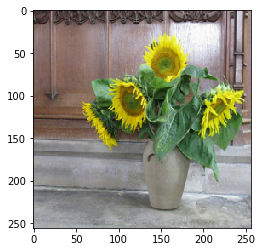

In [100]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

plt.imshow(array_to_img(test_data[1]))
plt.show()

In [101]:
cnn_pred = {}
for i in range(2000):
    for j in range(5):
        if predictions[i][j] == np.max(predictions[i]):
            if j == 0:
                cnn_pred[i] = 0
            if j == 1:
                cnn_pred[i] = 1
            if j == 2:
                cnn_pred[i] = 2
            if j == 3:
                cnn_pred[i] = 3
            if j == 4:
                cnn_pred[i] = 4

In [102]:
cnn_pred

{0: 3,
 1: 3,
 2: 1,
 3: 1,
 4: 3,
 5: 4,
 6: 3,
 7: 1,
 8: 0,
 9: 1,
 10: 2,
 11: 4,
 12: 4,
 13: 3,
 14: 1,
 15: 1,
 16: 4,
 17: 3,
 18: 1,
 19: 1,
 20: 0,
 21: 4,
 22: 2,
 23: 3,
 24: 4,
 25: 3,
 26: 4,
 27: 1,
 28: 3,
 29: 1,
 30: 1,
 31: 1,
 32: 3,
 33: 4,
 34: 3,
 35: 1,
 36: 3,
 37: 0,
 38: 1,
 39: 3,
 40: 1,
 41: 4,
 42: 3,
 43: 3,
 44: 0,
 45: 0,
 46: 1,
 47: 1,
 48: 3,
 49: 4,
 50: 3,
 51: 0,
 52: 0,
 53: 1,
 54: 4,
 55: 1,
 56: 0,
 57: 0,
 58: 3,
 59: 0,
 60: 3,
 61: 3,
 62: 3,
 63: 4,
 64: 1,
 65: 1,
 66: 3,
 67: 1,
 68: 4,
 69: 0,
 70: 2,
 71: 4,
 72: 2,
 73: 0,
 74: 0,
 75: 0,
 76: 1,
 77: 0,
 78: 1,
 79: 4,
 80: 1,
 81: 3,
 82: 3,
 83: 3,
 84: 4,
 85: 1,
 86: 4,
 87: 1,
 88: 1,
 89: 3,
 90: 3,
 91: 1,
 92: 4,
 93: 4,
 94: 1,
 95: 3,
 96: 3,
 97: 1,
 98: 1,
 99: 4,
 100: 3,
 101: 1,
 102: 4,
 103: 3,
 104: 4,
 105: 0,
 106: 1,
 107: 3,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 0,
 114: 1,
 115: 0,
 116: 1,
 117: 4,
 118: 2,
 119: 4,
 120: 1,
 121: 4,
 122: 1,
 12

In [103]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

submit = pd.DataFrame({'id': ids, 'flower_class': cnn_pred})
header = ["id", "flower_class"]
submit.to_csv('cnn_resnet_JIMMY2.csv', columns = header, index=False)